# 04 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `04_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_04` folder, in which you create another folder called `data`
4. Copy paste the notebook `04_Homework` from the lectures repo to the working-folder. Copy the csv file `WHO_COVID19_cases.csv` into the `working-folder/Session_04/data` directory.
5. Do the exercises on 04_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 24th 01:29 pm CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## Dataset: use the WHO_COVID19_cases.csv dataset from Session_01

## 1- Filter the data for 3 countries and draw a line plot for Cumulative_cases vs Date_reported using seaborn (7.5 points)

*Tip: you may want to explore `plt.xticks(rotation=90);` and `plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6)) ;` to unclutter the dates on the x-axis*

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('./data/WHO_COVID19_cases.csv')
df.head(5)

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


In [3]:
countries = ['Italy', 'Ireland', 'Japan']
df_countries = df[df['Country'].isin(countries)]
df_countries.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
25864,2020-01-05,IE,Ireland,Europe,EURO,NaN,0,NaN,0
25865,2020-01-12,IE,Ireland,Europe,EURO,NaN,0,NaN,0
25866,2020-01-19,IE,Ireland,Europe,EURO,NaN,0,NaN,0
25867,2020-01-26,IE,Ireland,Europe,EURO,NaN,0,NaN,0
25868,2020-02-02,IE,Ireland,Europe,EURO,NaN,0,NaN,0


In [7]:
df_countries['Date_reported'] = pd.to_datetime(df_countries['Date_reported'])
df_countries['Date_reported'].dtype

C:\Users\armel\AppData\Local\Temp\ipykernel_18732\3875922831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['Date_reported'] = pd.to_datetime(df_countries['Date_reported'])


dtype('<M8[ns]')

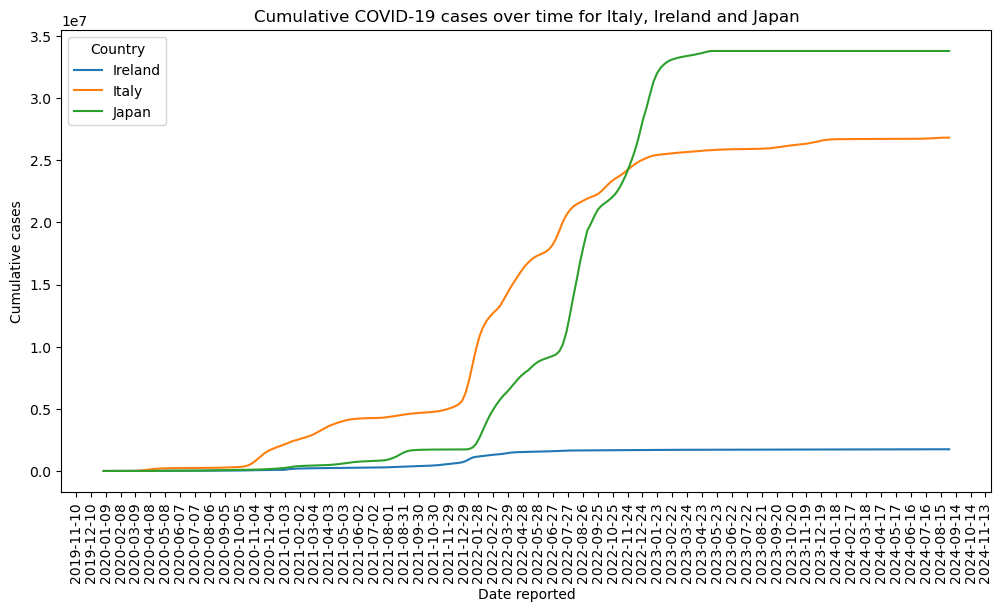

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = df_countries, x = 'Date_reported', y = 'Cumulative_cases', hue='Country')

# Customize the x-axis
plt.xticks(rotation=90) 
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(30))

# Add labels and title
plt.xlabel('Date reported')
plt.ylabel('Cumulative cases')
plt.title('Cumulative COVID-19 cases over time for Italy, Ireland and Japan')

plt.show()

## 2- Make a line plot showing the cumulative_deaths vs cumulative_cases for 3 countries using `plotly` (7.5 points)

In [16]:
import plotly.express as px

In [24]:
countries = ['Austria', 'Argentina', 'Australia'] 
df_countries_2 = df[df['Country'].isin(countries)]

In [28]:
# Create an interactive line plot for Cumulative_deaths vs Cumulative_cases
fig = px.line(df_countries_2, x='Cumulative_cases', y='Cumulative_deaths', color='Country', title='Cumulative deaths vs cumulative cases for Austria, Argentina and Australia', labels={'Cumulative_cases': 'Cumulative cases', 'Cumulative_deaths': 'Cumulative deaths'})
fig.show()